# 機器學習 - K-Means 群集分析法
- 學期: 111 機器學習 Summer Session 教材 (師培中心)
- 杜主民

## 範例一 (投影片例題)

### 資料
- 座標平面，有 16 個點，X 軸與 Y 軸代表兩個特徵值，分別是: <br>
(1, 3), (1, 4), (2, 2), (2, 5), 2(6), (3, 2), (3, 3), (3, 8), (4, 4), (4, 6), (5, 0), (5, 5), (6, 2), (6, 6), (7, 2) 及 (7, 4)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[7,5]

- 建立原始 16 筆資料
- 繪製資料的散布圖

In [33]:
X = np.array([[1,3],[1,4],[2,2],[2,5],[2,6],[3,2],[3,3],[3,8],[4,4],[4,6],[5,0],[5,5],[6,2],[6,6],[7,2],[7,4]])

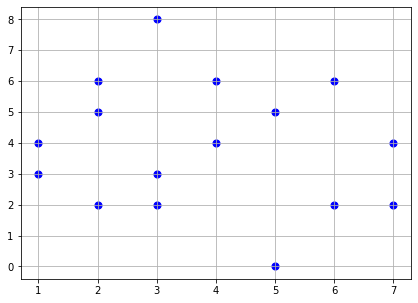

In [34]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')
plt.grid(True)

### 建立 k-means 物件
- 使用 sklearn.cluster 模組的 KMeans
- 設定 k 值為 2

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)  # 設定 k 值為 2
kmeans.fit(X)

# 預測資料 X 所屬的分群
y_kmeans = kmeans.predict(X)

- 預測資料 X 所屬的分群

In [36]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


- 繪出散布圖，以及分群中心點

In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

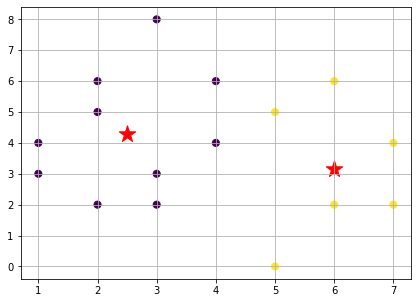

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

#分群中心點
centers = kmeans.cluster_centers_ 

plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=300)
plt.grid(True)

In [14]:
print(f'分群中心點: {centers[0]}, {centers[1]}')

分群中心點: [6.         3.16666667], [2.5 4.3]


```
兩個分群中心點，分別是[6, 3.16666667]，以及 [2.5, 4.3]，和投影片中計算的結果不盡相同!
投影片的步驟二是隨機給出 k 個點，作為分群中心，一開始我們選擇了 (2, 2), (6, 6) 作為分群中心。
第一次計算新的群心點得出 (2.56, 3.22)，(5.43, 4.71)
第二次計算新的群心點得出 (2.38, 3.13)，(5.25, 4.63)
第三次計算新的群心點一樣得出 (2.38, 3.13)，(5.25, 4.63)
第三次與第二次的答案相同，所以分群完畢，兩個分群的中心點是 (2.38, 3.13)，(5.25, 4.63) 

但是，這個中心點和 sklearn.cluster.KMeans 的結果不相同! 該如何解釋此情況?

若一開始選擇的中心點不相同，答案會和sklearn.cluster.KMeans 計算的結果相同嗎?
```

<hr style='border-color:brown; border-width:2px'>

## 範例一延伸，設定 k=3

In [39]:
X = np.array([[1,3],[1,4],[2,2],[2,5],[2,6],[3,2],[3,3],[3,8],[4,4],[4,6],[5,0],[5,5],[6,2],[6,6],[7,2],[7,4]])

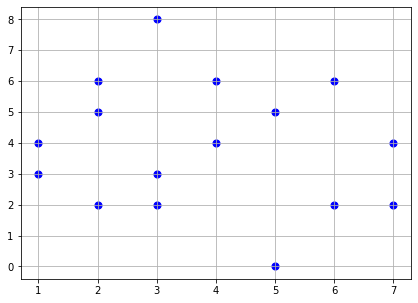

In [40]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')
plt.grid(True)

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  # 設定 k 值為 3
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

- 預測資料 X 所屬的分群

In [45]:
y_kmeans

array([2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1])

- 繪出散布圖，以及分群中心點

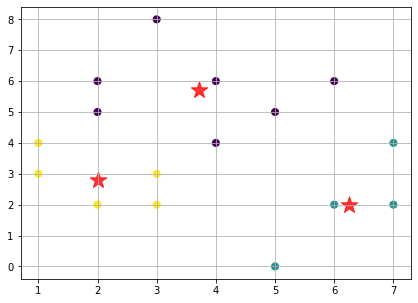

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

#分群中心點
centers = kmeans.cluster_centers_ 

# plt.scatter 相關參數
# c:設定點的顏色； marker:設定點的形狀； s:設定點的大小； alpha:設定點的透明度, 
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=300, alpha=0.8) 
plt.grid(True)

In [50]:
print(f'分群中心點: {centers[0]}, {centers[1]}, {centers[2]}')

分群中心點: [3.71428571 5.71428571], [6.25 2.  ], [2.  2.8]


<hr style='border-color:brown; border-width:3px'>

### 練習題 一: 請自行以相同的資料進行 k=2 分群，但以 (2, 5) 和 (7, 4) 當成一開始的分群中心，請計算出分群中心點。(請自行練習)

In [ ]:
# Solution 1


<hr style='border-color:brown; border-width:3px'>

## 範例二
- sklearn.datasets 提供 make_bolbs 套件，用於測試群集分析算法
- 此範例以 make_blobs產生 20 筆樣本總數，每筆資料有 2 個特徵、設計 2 個分群

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [52]:
# 載入 make_blogs 套件
from sklearn.datasets import make_blobs

### 使用 sklearn.datasets make_blobs 套件
- 以高司函數產生**同向性(isotropic)**的斑點分布數據。
- make_blobs會根據指定的樣本總數、特徵數量、中心點數量、範圍等來生成數據，這些數據用於測試群集分析算法的效果。
- n_samples: 待生成的樣本的總數。
- n_features: 每個樣本的特徵數量。
- centers 表示分群中心數。

In [59]:
# make_blobs產生 60 筆樣本總數，每筆資料有 2 個特徵、設計 3 個分群

# X 是資料筆數，y 是該筆資料屬於第幾分群
X, y = make_blobs(n_samples=60, centers=3, n_features=2, random_state=0)
print(X.shape)

(60, 2)


In [60]:
print(X[0:3])
print(y[0:3])

[[0.89011768 1.79849015]
 [0.62835793 4.4601363 ]
 [1.1312175  4.68194985]]
[1 0 0]


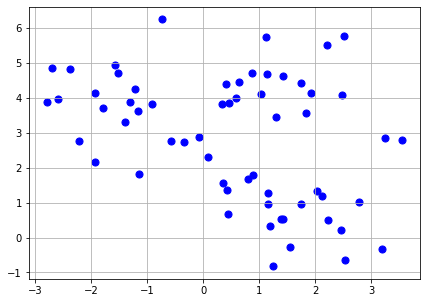

In [61]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='b')
plt.grid(True)

In [69]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

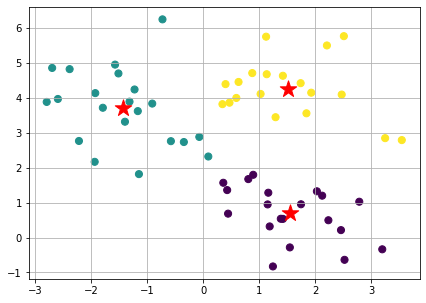

In [73]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=300)
plt.grid(True)

In [75]:
print(f'分群中心點: {centers[0]}, {centers[1]}, {centers[2]}')

分群中心點: [1.5540348  0.69215861], [-1.44219107  3.70063824], [1.5135037  4.26674962]


### 預測
- 當給予一個點 xSample = np.array([2.5, 2.1])，該如何分類?

In [76]:
x_sample1 = np.array([[3, 1]])
kmeans.predict(x_sample1)

array([0])

<hr style='border-color:brown; border-width:3px'>

## 範例三
- sklearn.datasets 提供 make_bolbs 套件，用於測試群集分析算法
- 此範例 make_blobs產生 100 筆樣本總數，每筆資料有 5 個特徵、設計 5 個分群

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [93]:
from sklearn.datasets import make_blobs

# X 是資料筆數，y 是該筆資料屬於第幾分群，n_featuers=10 表示每筆資料有 10 個欄位
X, y = make_blobs(n_samples=100, centers=5, n_features=5, random_state=0)
print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [95]:
centers = kmeans.cluster_centers_
centers

array([[ 6.00442055,  0.57370111,  1.08462188,  8.59788996, -8.701213  ],
       [-8.90571044, -9.68834512,  6.24431556,  5.53235106,  7.26455964],
       [ 0.81271923,  4.50408279,  2.01265472,  1.10438201, -1.44318939],
       [ 3.10309252, -1.35778337,  7.82603972,  9.06552282, -2.66072814],
       [ 9.06131352,  5.97938462, -0.42952619,  5.71544443, -7.52683984]])

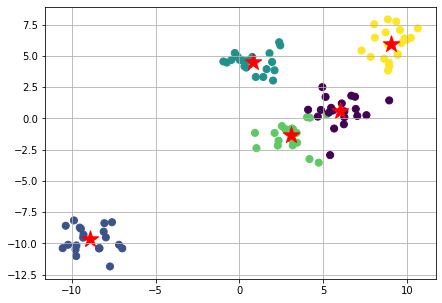

In [96]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=300)
plt.grid(True)

In [98]:
# 印出分群中心點
for gp in centers:
    print(gp)

[ 6.00442055  0.57370111  1.08462188  8.59788996 -8.701213  ]
[-8.90571044 -9.68834512  6.24431556  5.53235106  7.26455964]
[ 0.81271923  4.50408279  2.01265472  1.10438201 -1.44318939]
[ 3.10309252 -1.35778337  7.82603972  9.06552282 -2.66072814]
[ 9.06131352  5.97938462 -0.42952619  5.71544443 -7.52683984]


<hr style='border-color:brown; border-width:3px'>

## 2021 年 1 月 到 12 月，台南市發生車禍的紀錄案例

- <a href='https://data.tainan.gov.tw/'>台南市政府資料開放平台</a>
- 鍵入`交通事故`關鍵字搜尋。
- 點選 `臺南市道路交通事故原因傷亡統計`進入另一個畫面，選擇`臺南市110年上半年道路交通事故原因傷亡統計`。

## 問題:  讀取資料後，請根據資料集的 GPS 經緯度，以 K-Means 方法，找出台南市 6 個車禍的分群區域，在圖上畫出每一個車禍的地點，並標示出分群中心點。
- <font color='blue'>PS: 若車禍地點不在台南市範圍內，請刪去那些資料。</font>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. 讀取資料

In [102]:
traffic110_1 = pd.read_csv('./data/11001-06accident.csv')  # 110 上半年台南市交通事故統計
traffic110_2 = pd.read_csv('./data/11007-12accident.csv')  # 110 下半年台南市交通事故統計

In [103]:
print(traffic110_1.columns)
print(traffic110_1.shape)

Index(['案件編號', '發生日期', '發生時間', 'GPS經度', 'GPS緯度', '案件類別名稱', '地址類型名稱', '發生縣市名稱',
       '24小時內死亡人數', '2-30日內死亡人數', '受傷人數', '天候名稱', ' 速限-第1當事者', '道路型態大類別名稱',
       '事故位置大類別名稱', '號誌-號誌種類名稱', '事故類型及型態大類別名稱', '肇因研判子類別名稱-主要'],
      dtype='object')
(20115, 18)


### 要進行 K-Means 非監督式學習
### 2. 只取用 `GPS經度` 和 `GPS緯度` 兩個欄位。

In [104]:
traffic110GPS_1 = traffic110_1[['GPS經度','GPS緯度']]
traffic110GPS_2 = traffic110_2[['GPS經度','GPS緯度']]

In [105]:
print(traffic110GPS_1.head(3))
print('-'*30)
print(traffic110GPS_2.head(3))
print('-'*30)
print(traffic110GPS_1.shape, traffic110GPS_2.shape)  # 上半年與下半年的資料筆數

        GPS經度      GPS緯度
0  120.229231  22.981324
1  120.211475  22.989310
2  120.227152  23.000013
------------------------------
        GPS經度      GPS緯度
0  120.235609  22.988087
1  120.221768  22.992784
2  120.233420  22.985245
------------------------------
(20115, 2) (21330, 2)


### 3. 合併上半年度 traffic110GPS_1 與下半年度 traffic110GPS_2
- 使用 `concat` 函數

In [106]:
traffic110GPS = pd.concat([traffic110GPS_1, traffic110GPS_2])
print(traffic110GPS.shape)

(41445, 2)


### 4. 繪製資料的散布圖

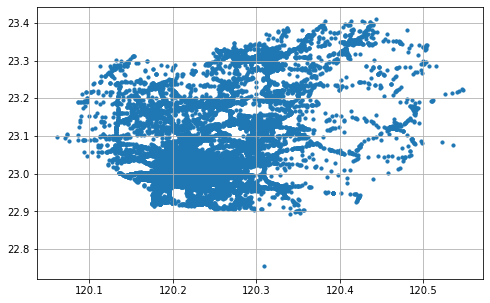

In [108]:
plt.rcParams['figure.figsize']=[8,5]
#plt.scatter(loglat.iloc[:, 0], loglat.iloc[:, 1], s=10)
plt.scatter(traffic110GPS['GPS經度'], traffic110GPS['GPS緯度'], s=10)
plt.grid(True)

### 部分資料超出台南市範圍的資料 (員警登記筆誤吧..)

In [109]:
traffic110GPS[traffic110GPS['GPS緯度'] < 22.88702]

,GPS經度,GPS緯度
15253,120.308957,22.753903


In [110]:
# 這筆資料應該不屬於台南市 
traffic110_1.iloc[15253]

案件編號                11005AC391B2506
發生日期                       20210528
發生時間                          74316
GPS經度                    120.308957
GPS緯度                     22.753903
案件類別名稱                         交通事故
地址類型名稱                           其他
發生縣市名稱          臺南市安南區段號長和路1段(永安橋頭)
24小時內死亡人數                         0
2-30日內死亡人數                        0
受傷人數                              1
天候名稱                              晴
 速限-第1當事者                        50
道路型態大類別名稱                       交岔路
事故位置大類別名稱                      交叉路口
號誌-號誌種類名稱                    行車管制號誌
事故類型及型態大類別名稱                    車與車
肇因研判子類別名稱-主要                 未依規定讓車
Name: 15253, dtype: object

### 上述的 GPS 位址明顯有錯誤.. 因為顯示的位置是在高雄市橋頭區

### 刪除索引值 15253 的錯誤資料

In [111]:
traffic110GPS.drop(index=15253, inplace=True, axis=0)
#traffic110GPS.iloc[15250:15255]

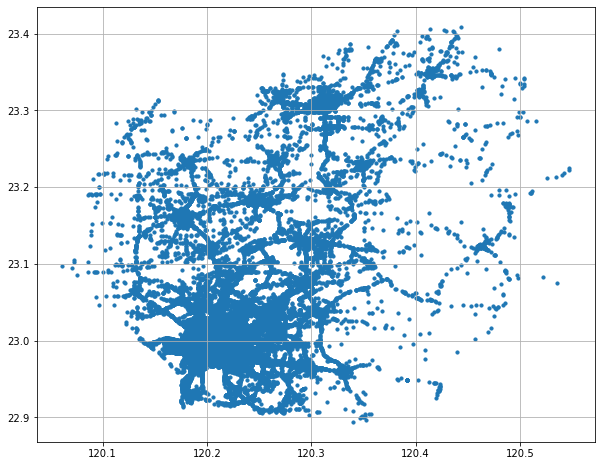

In [112]:
### 重新再繪製經緯度散布圖
plt.rcParams['figure.figsize']=[10,8]
plt.scatter(traffic110GPS['GPS經度'], traffic110GPS['GPS緯度'], s=10)
plt.grid(True)

### 進行 sklearn 的 K-Means 分群

In [ ]:
from sklearn.cluster import KMeans

In [113]:
kmeans = KMeans(n_clusters=6)  # 分成 6 群群資料
kmeans.fit(traffic110GPS)
loglat_kmeans = kmeans.predict(traffic110GPS)

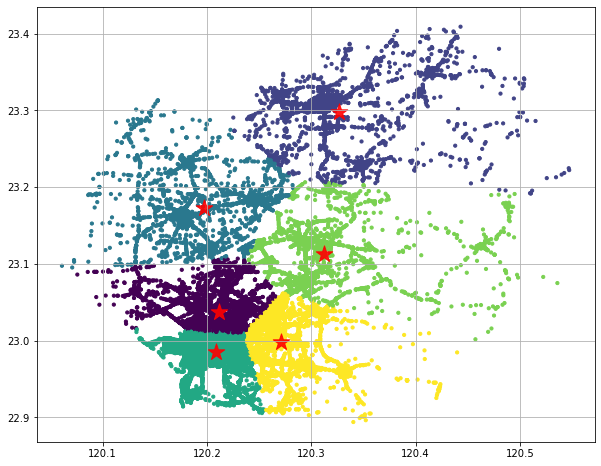

In [114]:
plt.scatter(traffic110GPS['GPS經度'], traffic110GPS['GPS緯度'], c=loglat_kmeans, s=10, cmap='viridis')

#分群中心點
centers = kmeans.cluster_centers_

# plt.scatter 相關參數
# c:設定點的顏色； marker:設定點的形狀； s:設定點的大小； alpha:設定點的透明度,
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=300, alpha=0.9)
plt.grid(True)